In [2]:
import os
import urllib.request
import tarfile

# URL of the tar file
for i in range(1, 6):

    if i <= 9:
        padded_number = str(i).zfill(2)
    else:
        padded_number = str(i)

    filename = f"fish_{padded_number}.tar"
    print(filename)
    url = f"https://groups.inf.ed.ac.uk/vision/DATASETS/FISH4KNOWLEDGE/WEBSITE/GROUNDTRUTH/RECOG/Archive/fish_image/{filename}"
    # Download the tar file
    tar_filename = os.path.join("Images/Test", filename)
    urllib.request.urlretrieve(url, tar_filename)

    # Extract the contents of the tar file
    with tarfile.open(tar_filename, 'r') as tar:
        tar.extractall(path="Images/Test")
 
    # Clean up: remove the downloaded tar file
    os.remove(tar_filename)

print("Download and extraction complete.")

fish_01.tar
fish_02.tar
fish_03.tar
fish_04.tar
fish_05.tar
Download and extraction complete.


In [2]:
import torch
import os
from skimage import io
from torchvision import transforms
from FishModel import FishModel

transform = transforms.Resize((256, 256))

model = FishModel()
model.load_state_dict(torch.load('Models/best.pt', map_location=torch.device('cpu')))
model.to("cpu")

reference_image_dir = "Images/References"

reference_images = []

for file in os.listdir(reference_image_dir):
    img = io.imread(os.path.join(reference_image_dir, file))
    img = torch.from_numpy(img).permute(2, 0, 1) / 255.0
    img = transform(img).unsqueeze(0)

    # Get the embeddings
    emb = model(img)

    reference_images.append(emb.detach().numpy())

correct = 0
total = 0

test_image_dir = "Images/Dataset"

actual_classes = []
predicted_classes = []


for folder in os.listdir(test_image_dir):

    # Get the class of the test image
    actual_cls = int(folder.split("_")[1])

    path = os.path.join(test_image_dir, folder)

    print(f"Testing class {actual_cls}...")

    # For each file in the "Images/Test" folder, predict the class
    for file in os.listdir(path):
        img = io.imread(os.path.join(path, file))
        img = torch.from_numpy(img).permute(2,0,1) / 255.0
        img = transform(img).unsqueeze(0)

        pred_cls = model.predict(img, reference_images)

        # Add 1 to the predicted class (Because the folder names start from 1)
        pred_cls = pred_cls + 1

        total += 1

        # If the predicted class is the same as the actual class, increment the correct counter
        if pred_cls == actual_cls:
            correct += 1

        if correct % 100 == 0:
            print(f"Correct: {correct}, Total: {total}, Accuracy: {correct/total * 100:.2f}%")


        actual_classes.append(actual_cls)
        predicted_classes.append(pred_cls)

    # print(f"Predicted class: {pred +1 }, Distance: {distances[pred]}, File: {file}")

print(f"Accuracy: {correct/total * 100:.2f}%")


# Total accuracy of all images: 79.13%

Testing class 1...
Correct: 100, Total: 204, Accuracy: 49.02%
Correct: 200, Total: 355, Accuracy: 56.34%
Correct: 300, Total: 479, Accuracy: 62.63%
Correct: 400, Total: 600, Accuracy: 66.67%
Correct: 500, Total: 767, Accuracy: 65.19%
Correct: 600, Total: 905, Accuracy: 66.30%
Correct: 700, Total: 1030, Accuracy: 67.96%
Correct: 800, Total: 1144, Accuracy: 69.93%
Correct: 900, Total: 1347, Accuracy: 66.82%
Correct: 1000, Total: 1509, Accuracy: 66.27%
Correct: 1000, Total: 1510, Accuracy: 66.23%
Correct: 1000, Total: 1511, Accuracy: 66.18%
Correct: 1100, Total: 1721, Accuracy: 63.92%
Correct: 1200, Total: 1886, Accuracy: 63.63%
Correct: 1300, Total: 2034, Accuracy: 63.91%
Correct: 1400, Total: 2166, Accuracy: 64.64%
Correct: 1500, Total: 2317, Accuracy: 64.74%
Correct: 1600, Total: 2619, Accuracy: 61.09%
Correct: 1700, Total: 2771, Accuracy: 61.35%
Correct: 1800, Total: 2890, Accuracy: 62.28%
Correct: 1800, Total: 2891, Accuracy: 62.26%
Correct: 1900, Total: 3024, Accuracy: 62.83%
Correc

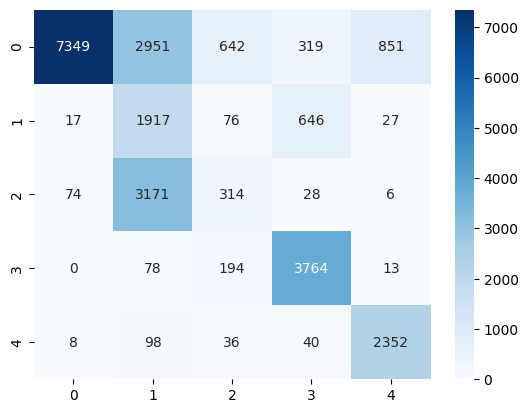

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn

matrix = confusion_matrix(actual_classes, predicted_classes)

heatmap = seaborn.heatmap(matrix, annot=True, fmt='g', cmap='Blues')

figure = heatmap.get_figure()
figure.savefig("cm_resnet_fulldataset.png", dpi=400)